# Regions investigation and workspace
This notebook allows to both:
- investigate the existing regioner on the given dataste
- develop new regioner and see the results live


In [51]:
import importlib
from utils import *

import skimage.morphology
import sep.inspect.regions as regions_inspect
import sep.assessors.regions as regions

## Prepare dataset

In [52]:
import sep.loaders.images
data_root = pick_path([root_dir / "tests" / "input"])
dataset = data_root / "humans"
data_loader = sep.loaders.images.ImagesLoader(str(dataset))

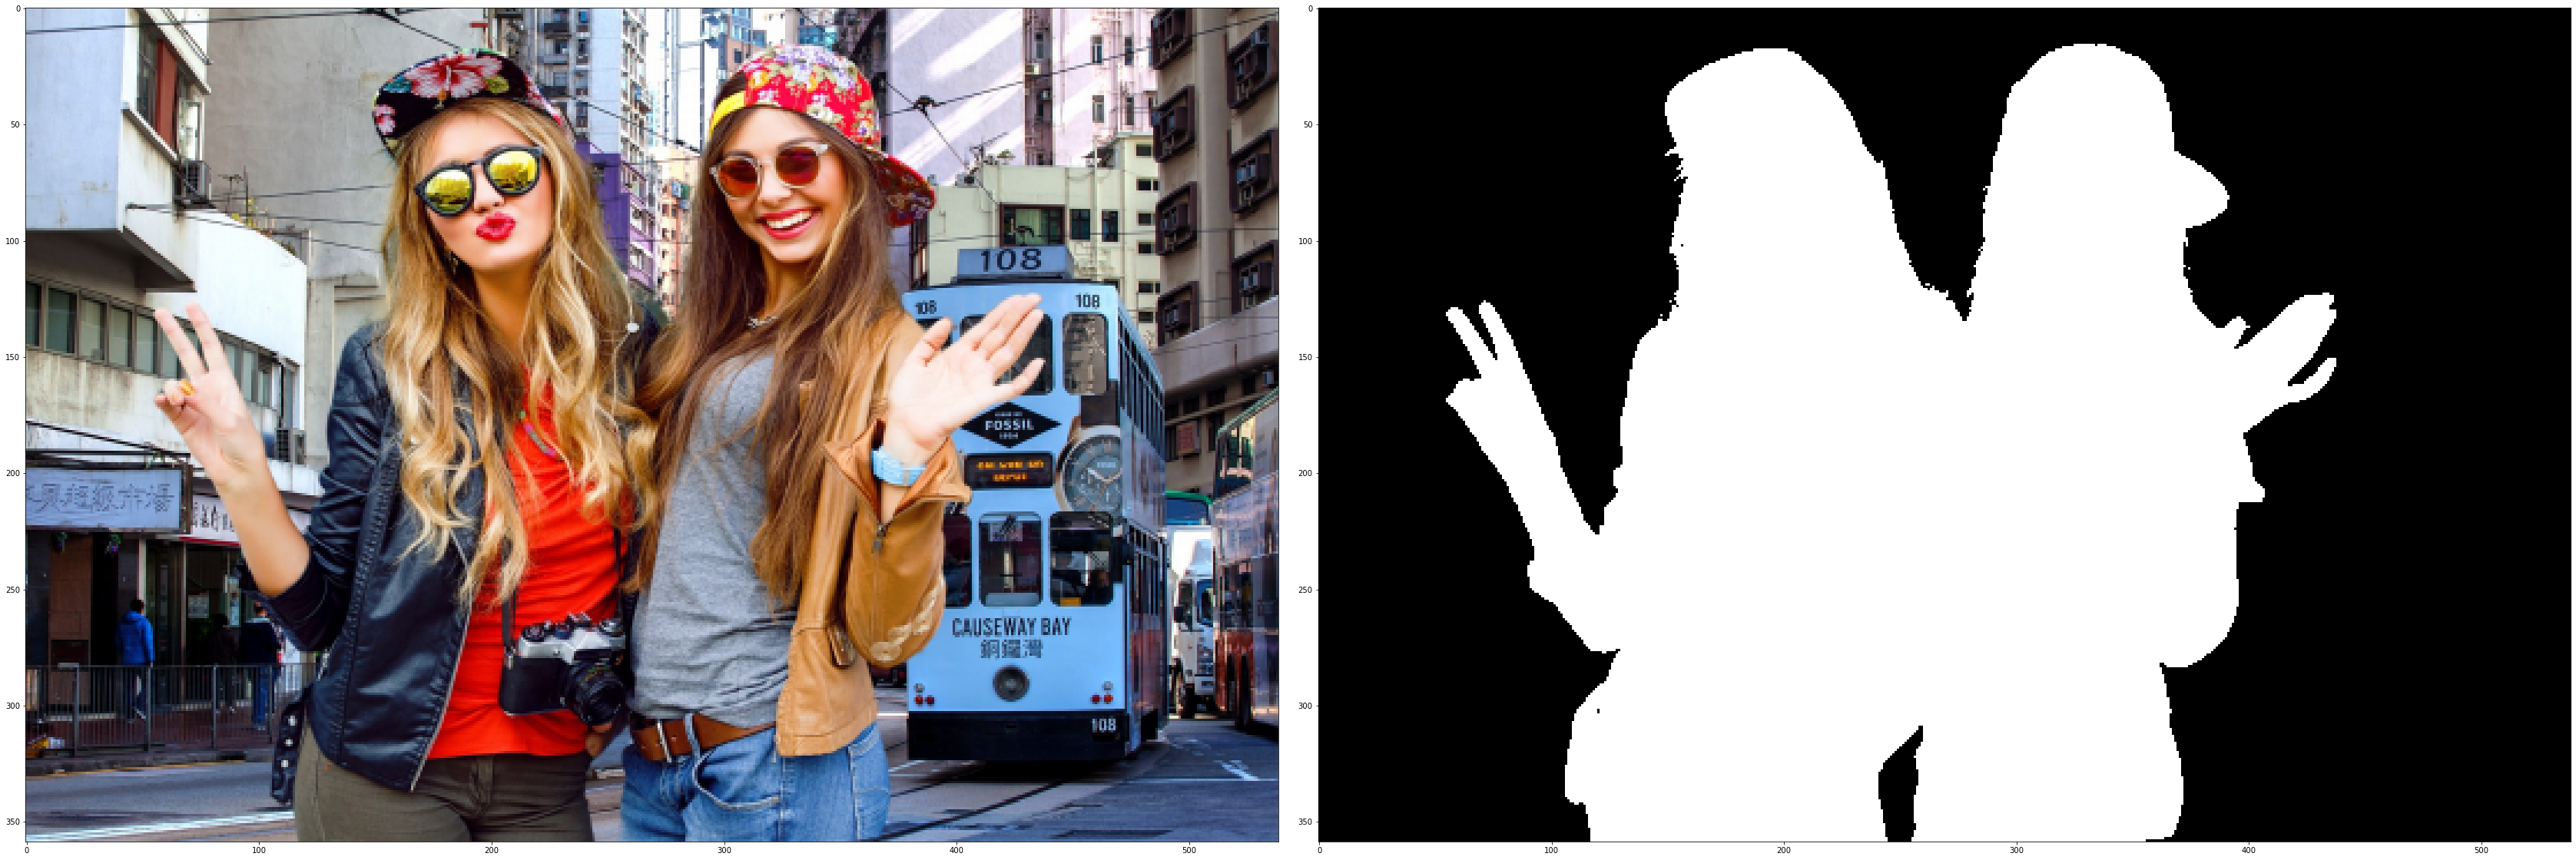

In [53]:
image = data_loader[0]['image']
annotation = data_loader[0]['annotation']
show_all(1, 2, image, annotation)

## Investigate the chosen regioner
In this section you can see the regions created by the chosen regionizer on the entire dataset. This allows to visually assess the sensibility of using that regioner.

In [54]:
importlib.reload(regions)
regioner = regions.EntireRegion()
regioner

In [71]:
full_image = np.ones_like(annotation)
region = regioner.regionize(annotation, mask=full_image)
info(annotation, "annotation")
info(full_image, "full_image")

annotation <class 'imageio.core.util.Array'>
Shape: (359, 539) Type: uint8 Min-max: 0 255
full_image <class 'imageio.core.util.Array'>
Shape: (359, 539) Type: uint8 Min-max: 1 1


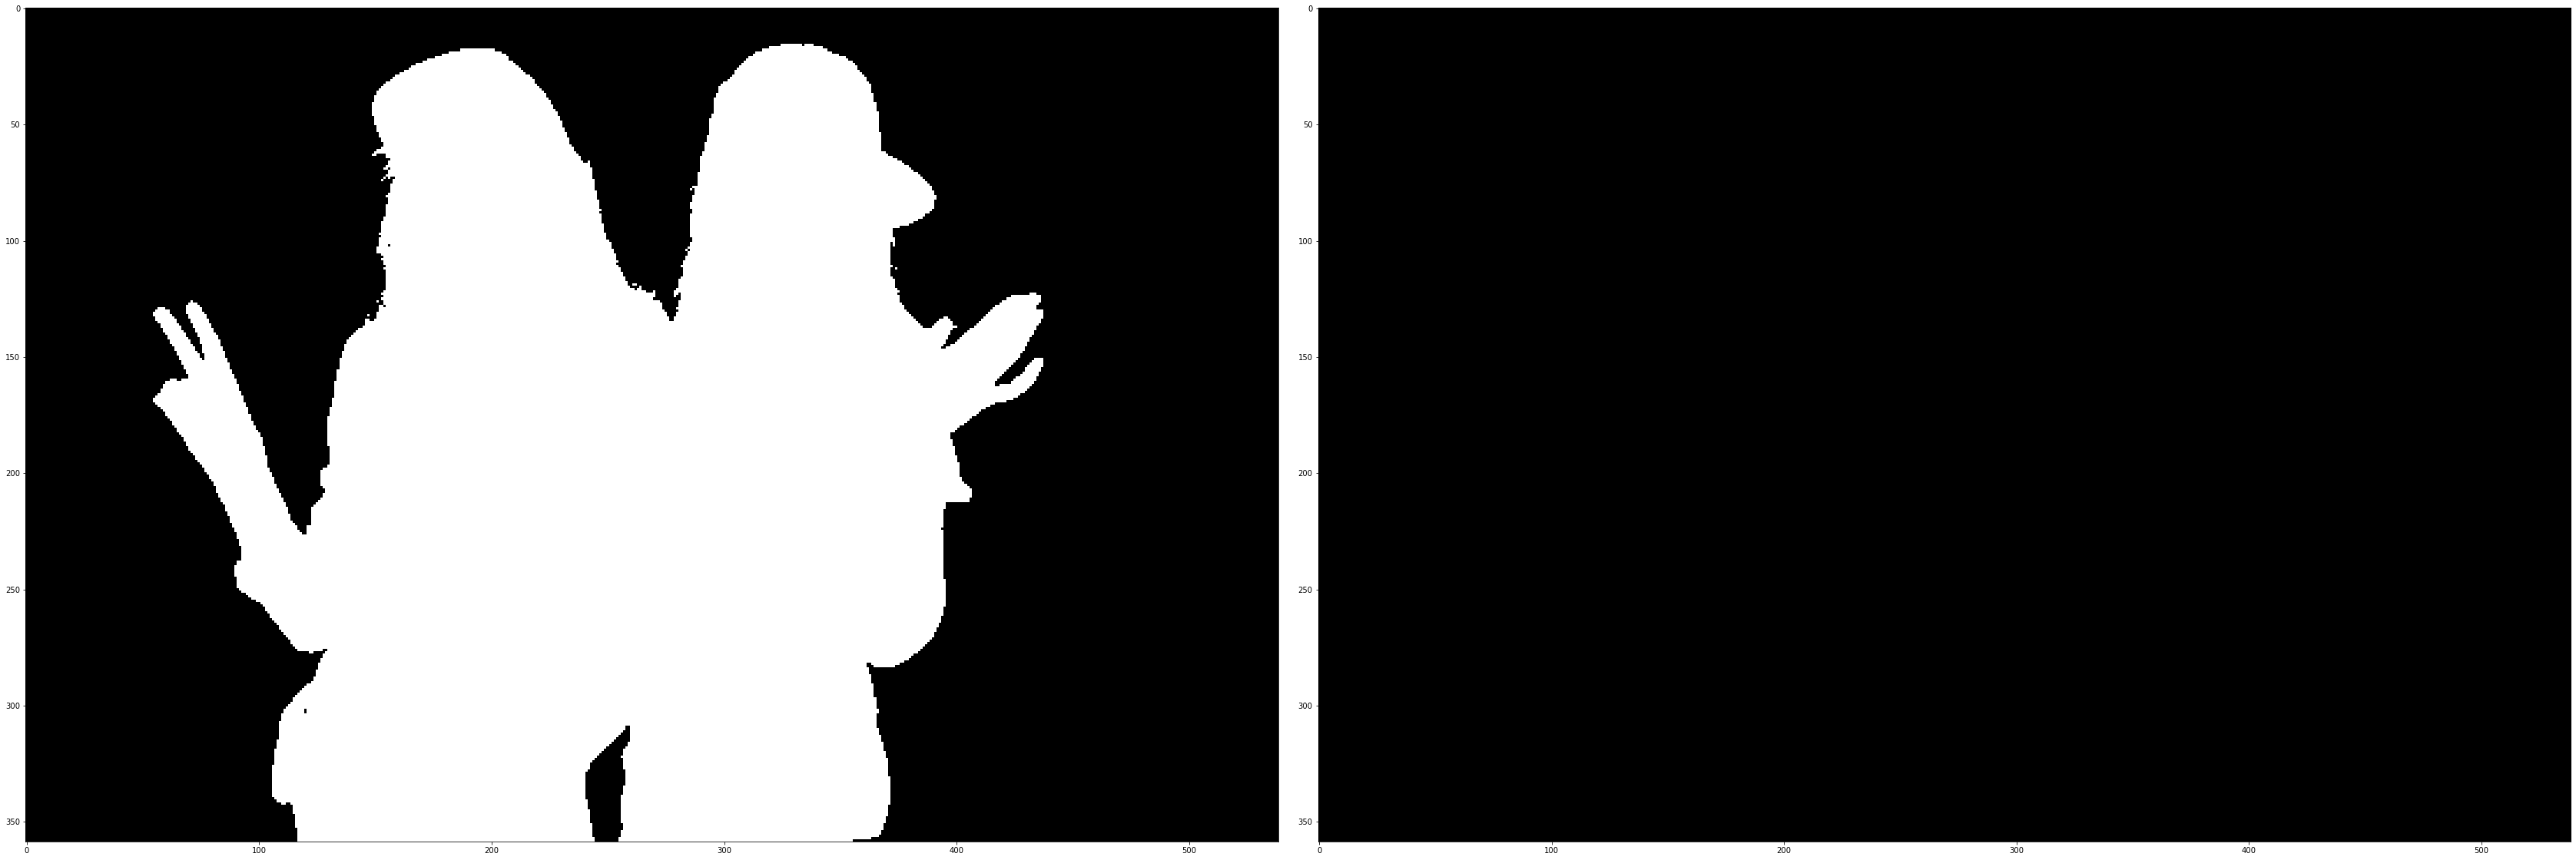

In [72]:
show_all(1, 2, annotation, region)

## Develop new regioner
In this section you can develop a new regionizer which you can later move to the actual Regioner class.

In [79]:
def new_regionize(ground_truth, mask) -> np.ndarray:
    selem = skimage.morphology.disk(6)
    dilated = skimage.morphology.binary_dilation(ground_truth, selem)
    eroded =  skimage.morphology.binary_erosion(ground_truth, selem)
    return dilated > eroded 

In [80]:
image_num = 0
image = data_loader[image_num]['image']
annotation = data_loader[image_num]['annotation']

 <class 'numpy.ndarray'>
Shape: (359, 539) Type: bool Min-max: False True


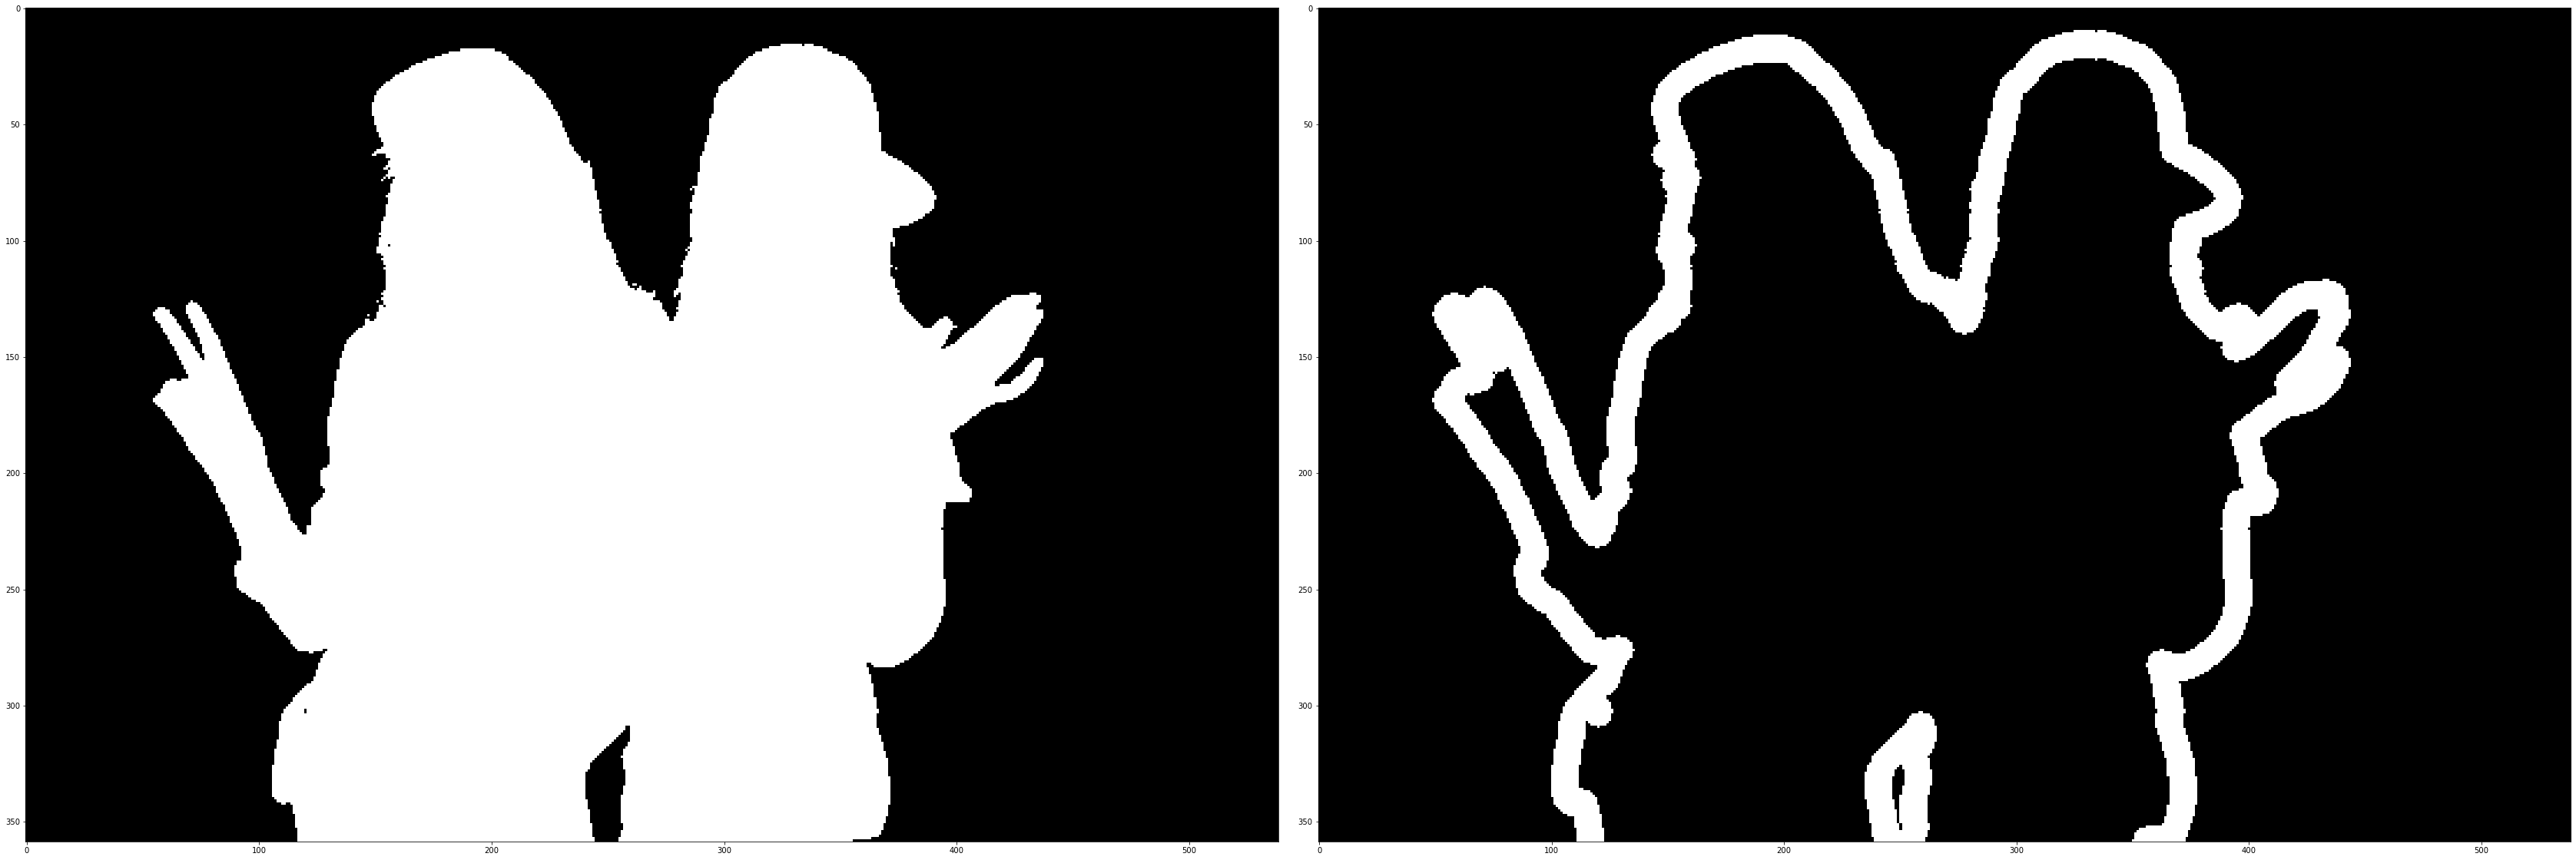

In [81]:
region = new_regionize(annotation, mask=full_image)
info(region)
show_all(1, 2, annotation, region)

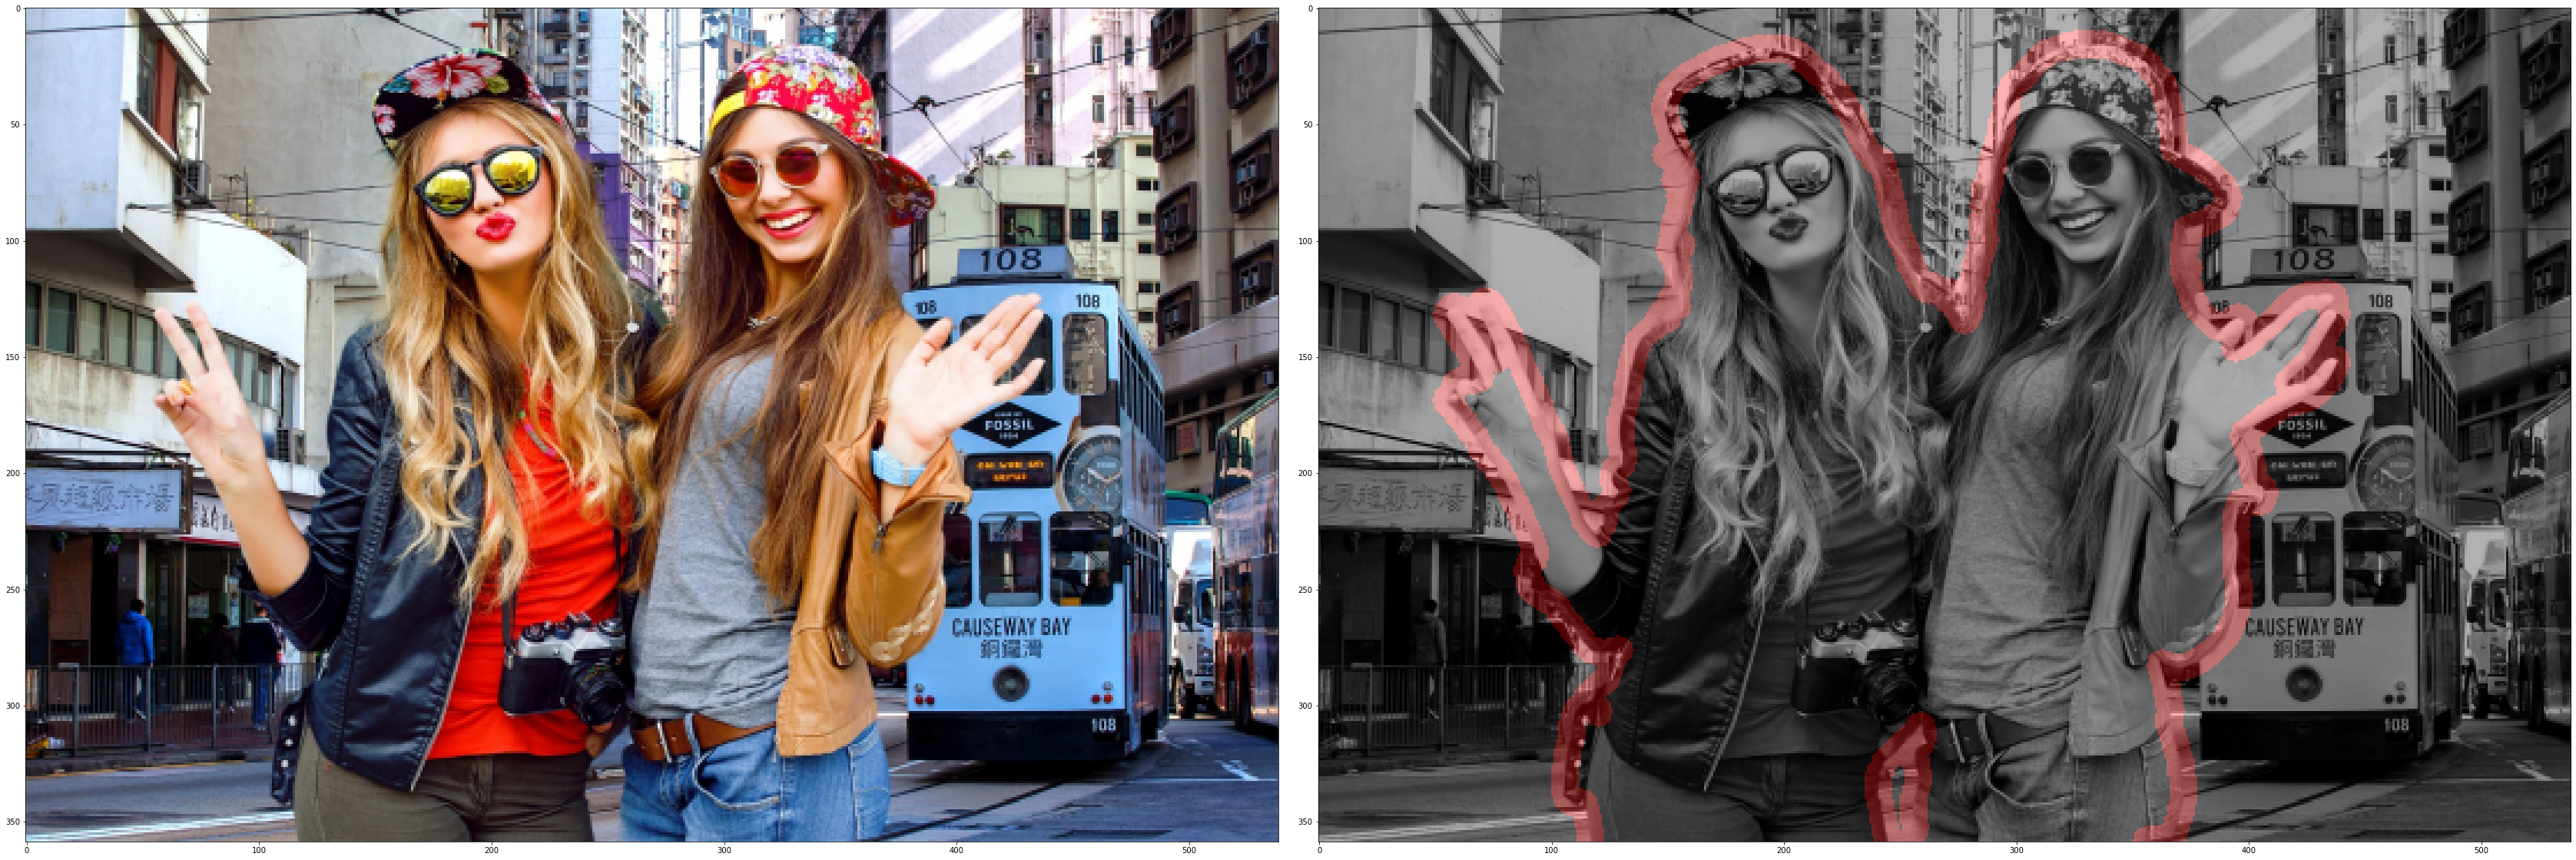

In [87]:
import skimage.color

overlay = skimage.color.label2rgb(region, image, bg_label=0)
show_all(1, 2, image, overlay)

#def overlay(image, colour, mask):
#    image[mask > 0][...,0] = 

In [82]:
visual_region = visualize_region(image, region)

NameError: name 'visualize_region' is not defined

In [ ]:
visual_region = visualize_regions(image, regions, regionizers)